In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [2]:
df = pd.read_csv('Foreign_Exchange_Rates.csv', 
                 usecols=[1,2,3,4,5,7], names=['Date', 'AUD', 'EUR', 'NZD', 'GBP', 'CAD'], 
                 skiprows=1, index_col=0)
columns = ['AUD', 'EUR', 'NZD', 'GBP', 'CAD']
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce', axis=1)
df.dropna(inplace=True)
df.head(10)

,AUD,EUR,NZD,GBP,CAD
Date,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.4465
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.4518
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.4518
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.4571
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.4505
2000-01-10,1.5242,0.9754,1.9350,0.6107,1.4568
2000-01-11,1.5209,0.9688,1.9365,0.6068,1.4570
2000-01-12,1.5202,0.9727,1.9286,0.6073,1.4550
2000-01-13,1.4954,0.9737,1.9084,0.6067,1.4495


<IPython.core.display.Javascript object>


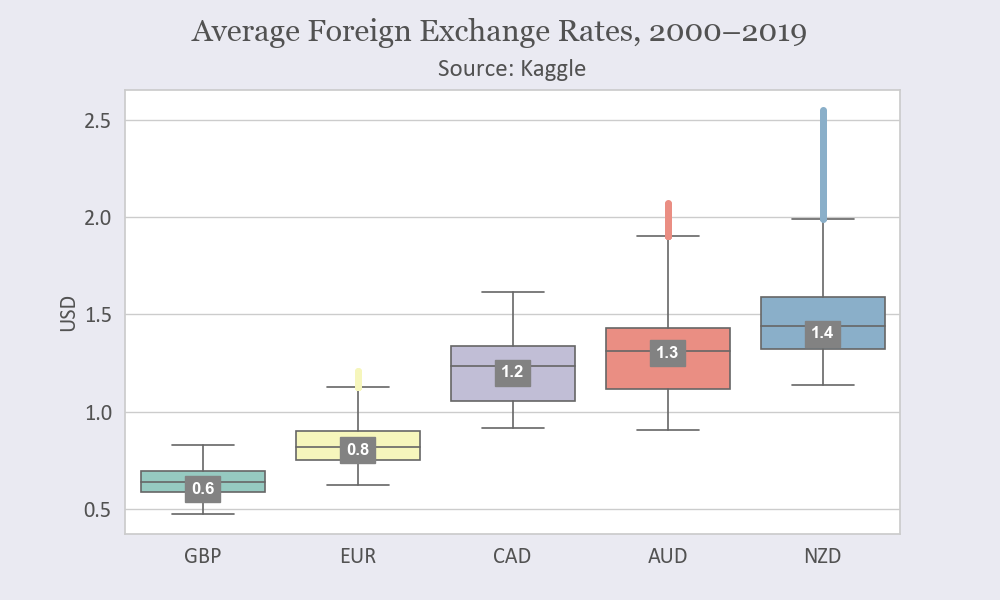

In [3]:
font_color = '#525252'
facecolor = '#eaeaf2'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

ax = sns.boxplot(data=df, 
                 palette='Set3', 
                 linewidth=1.2, 
                 fliersize=2, 
                 order=['GBP', 'EUR', 'CAD', 'AUD', 'NZD'],
                 flierprops=dict(marker='o', markersize=4),
               # showmeans=True
                )

ax.set_ylabel('USD', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)

title = 'Average Foreign Exchange Rates, 2000–2019'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = 'Source: Kaggle'
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)

for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='semibold', 
        size=12,
        color='white',
        bbox=dict(facecolor='#828282', edgecolor='#828282')
    )

In [4]:
filename = 'sns-boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)